## Customer Service Requests Analysis.

Elias Ejo, 01/07/2022

## Step 1: Import Python Libraries

In [1]:
# Data processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import others
import datetime as dt
import scipy.stats as stats
from scipy.stats import chi2_contingency

%matplotlib inline

## Step 2 : Understand the dataset

### 2.1: Load the dataset

In [2]:
# Read 311-Service-Requests dataset from file
nyc_df = pd.read_csv("311-service-requests-nyc.csv", low_memory=False)

nyc_df is a variable which stores the data loaded from csv file.


### 2.2: Visualize the dataset

In [105]:
# Print first 5 rows of the dataset
nyc_df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Time Elapsed,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330,3330
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233,5233


In [106]:
# Print last 5 rows of the dataset
nyc_df.tail(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Time Elapsed,Request_Closing_Time
364556,29610889,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",9653,9653
364557,29611816,2015-01-01 00:00:50,2015-01-01 02:47:50,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)",10020,10020


### 2.3: Print the columns of the DataFrame

In [5]:
# print the columns name of the dataframe
nyc_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

### 2.4: Identify the shape of the dataset

In [6]:
# Check the size of the dataset
nyc_df.shape

(364558, 53)

Observation:
* The dataset has 364,558 rows and 53 columns

In [5]:
# Print detail information about the dataframe
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

Observation: 
* There are 53 columns in the dataframe.


### 2.5: Identify the variables with null values

In [11]:
# Identify variables with null values
count = nyc_df.isnull().sum().sort_values(ascending=False)
percent = (nyc_df.isnull().mean()*100).sort_values(ascending=False)

missing_df = pd.concat([count, percent], axis=1,keys=['Missed-Count', 'Missed-Percent'])
missing_df = missing_df[missing_df['Missed-Count'] > 0]
# Print out missed value count and percentile of columns
missing_df

,Missed-Count,Missed-Percent
School or Citywide Complaint,364558,100.000000
Vehicle Type,364558,100.000000
Taxi Company Borough,364558,100.000000
Taxi Pick Up Location,364558,100.000000
Garage Lot Name,364558,100.000000
Ferry Direction,364557,99.999726
Ferry Terminal Name,364556,99.999451
Road Ramp,364296,99.928132
Bridge Highway Segment,364296,99.928132
Bridge Highway Name,364261,99.918531


In [12]:
len(missing_df)

35

Observation:
* There are 35 columns/variables that have missing values.
* Top 15 columns containing more than 85% of missing values

## Step 3: Perform basic data exploratory analysis

### 3.1: Draw a frequency plot to show the number of null values in each column of the DataFrame

<AxesSubplot: >

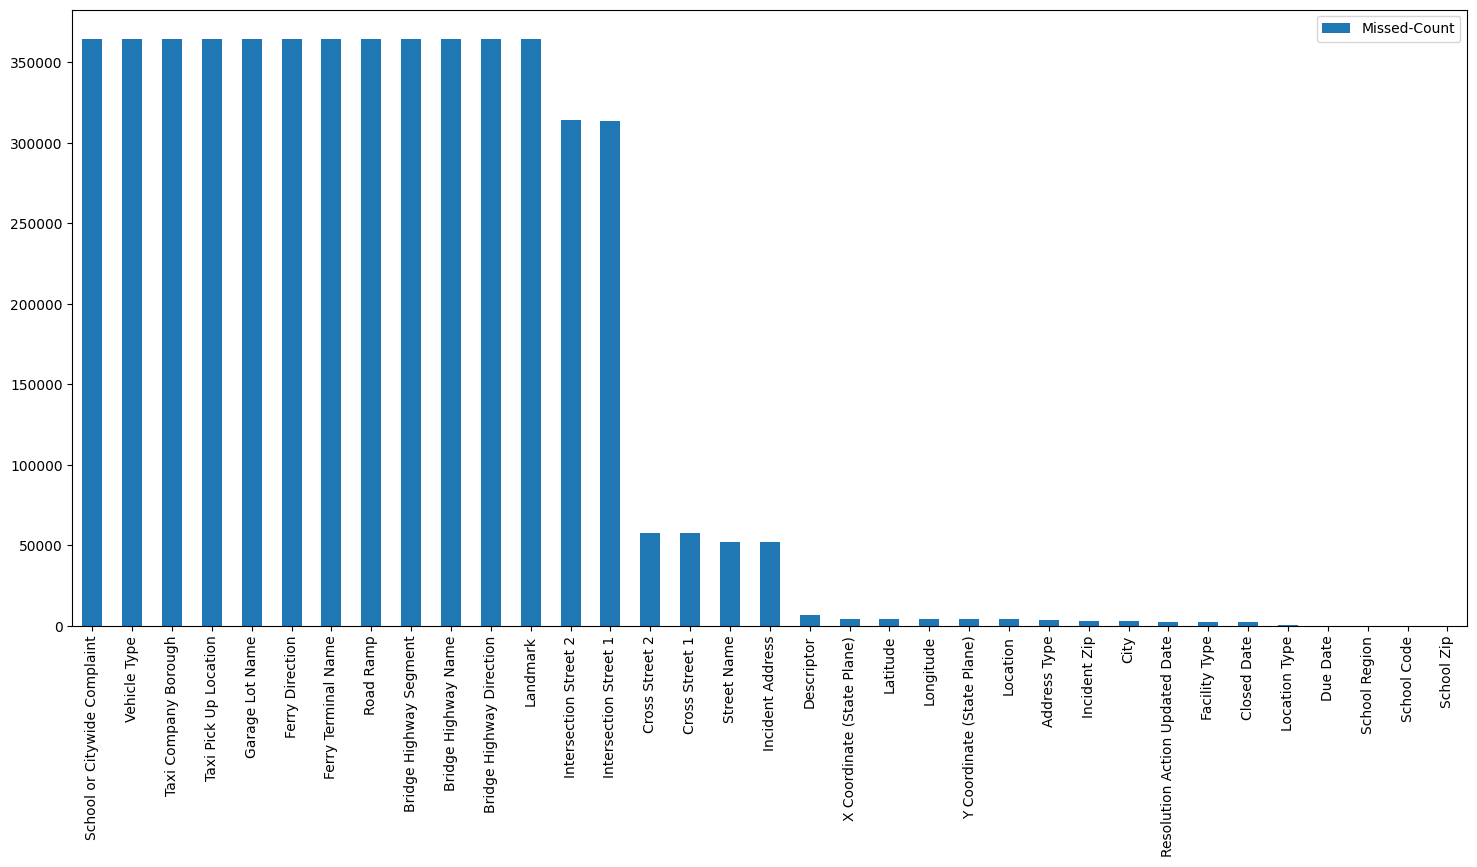

In [18]:
missing_df.plot(kind='bar', y='Missed-Count', rot=90, figsize=(18, 8))

### 3.2: Missing Value Treatment

#### 3.2.1: Delete columns with more than 85% null values

In [23]:
# Features with more than 85% NULL values needs to be drop from the DataFrame.

Col_name_to_delete = ["School or Citywide Complaint","Vehicle Type","Taxi Company Borough","Taxi Pick Up Location",
                    "Garage Lot Name","Ferry Direction","Ferry Terminal Name","Road Ramp","Bridge Highway Segment",
                    "Bridge Highway Name","Bridge Highway Direction","Landmark","Intersection Street 2","Intersection Street 1"]

# drop those columns from the dataframe
nyc_df = nyc_df.drop(Col_name_to_delete, axis=1)

In [24]:
# Check the size of the dataframe after droping the columns
nyc_df.shape

(364558, 39)

Observation:
* All columns with more than 85% NULL values has been deleted
* Columns nubmer decrease from 53 to 39

#### 3.2.2: Remove the records whose Closed Date values are null

In [25]:
# Delete rows if Closed-Date value are NULL
nyc_df = nyc_df.dropna(subset=["Closed Date"], axis=0)

In [26]:
# Check for missing Closed Date after droping rows with NULL value
nyc_df["Closed Date"].isna().sum()

0

Observation:
* As we can see, there is no row with null Closed Date in dataframe.

### 3.3: Analyze the date column, and remove entries that have an incorrect timeline

#### 3.3.0: Convert date column into Datetime type and check for incorrect timeline entries

In [27]:
# Convert the data type
nyc_df["Created Date"] = pd.to_datetime(nyc_df["Created Date"],format="%m/%d/%Y %I:%M:%S %p") 
nyc_df["Closed Date"] = pd.to_datetime(nyc_df["Closed Date"] ,format="%m/%d/%Y %I:%M:%S %p",  errors='coerce') 
nyc_df['Due Date'] = pd.to_datetime(nyc_df["Due Date"] ,format="%m/%d/%Y %I:%M:%S %p",  errors='coerce') 

In [42]:
# Updating Due Date with Closed Date where Due Date is empty
nyc_df.loc[nyc_df['Due Date'].isna(),'Due Date'] = nyc_df[nyc_df['Due Date'].isna()]['Closed Date']

In [43]:
# # Print detail information about date columns
nyc_df[["Created Date","Closed Date",'Due Date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Created Date  362177 non-null  datetime64[ns]
 1   Closed Date   362177 non-null  datetime64[ns]
 2   Due Date      362177 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 11.1 MB


Observation: 
* All 3 date columns are of data type datetime64.

In [29]:
# Check for entries that have an incorrect timeline
incorrect_timeline_df =  nyc_df[nyc_df["Created Date"] >= nyc_df["Closed Date"] ]
incorrect_timeline_df[["Created Date", "Closed Date"]]

,Created Date,Closed Date


Observation: 
* As we can see, there are no entries that have an incorrect timeline

#### 3.3.1: Calculate the time elapsed in closed and creation date

In [44]:
# To get the time elapsed for processing a request subtract 'Creation Date' from 'Closed Date'
# Create new column Request_Closing_Time
nyc_df["Request_Closing_Time"] = (nyc_df["Closed Date"] - nyc_df["Created Date"]).dt.seconds

Observation:
* New column called Request_Closing_Time created. And it stores elapsed time in form of seconds.

#### 3.3.2: View the descriptive statistics for the newly created column

In [45]:
# Print descriptive statistics for 'Request_Closing_Time' column
nyc_df["Request_Closing_Time"].describe()

count    362177.000000
mean      13898.326843
std       13631.143892
min           1.000000
25%        4509.000000
50%        9539.000000
75%       18613.000000
max       86399.000000
Name: Request_Closing_Time, dtype: float64

#### 3.3.3: Check the number of null values in the Complaint_Type and City columns

In [33]:
# Print the count of null values
print(f"Complaint Type missed value count = {nyc_df['Complaint Type'].isna().sum()}")
print(f"City missed value count = {nyc_df['City'].isna().sum()}")

Complaint Type missed value count = 0
City missed value count = 674


Observation:
* As we can see, there are no null values present in 'Complaint Type' column but there are 674 values in City column.

#### 3.3.4: Impute the NA value with Unknown City

In [34]:
# Impute the missing value of City with Unknown
nyc_df['City'].fillna("Unknown City", inplace=True)

In [35]:
# Let's again check the missing value count after the imputing
nyc_df['City'].isna().sum()

0

Observation:
* As we can see, there are no null values present in City column.

#### 3.3.5: To elimintae duplication make uppercase all city names

In [36]:
# Convert City column into uppercase to elimintae duplication
nyc_df['City'] = nyc_df['City'].str.upper()

#### 3.3.6: Draw a frequency plot for the complaints in each city

<AxesSubplot: title={'center': 'Total Complaints In Each City'}>

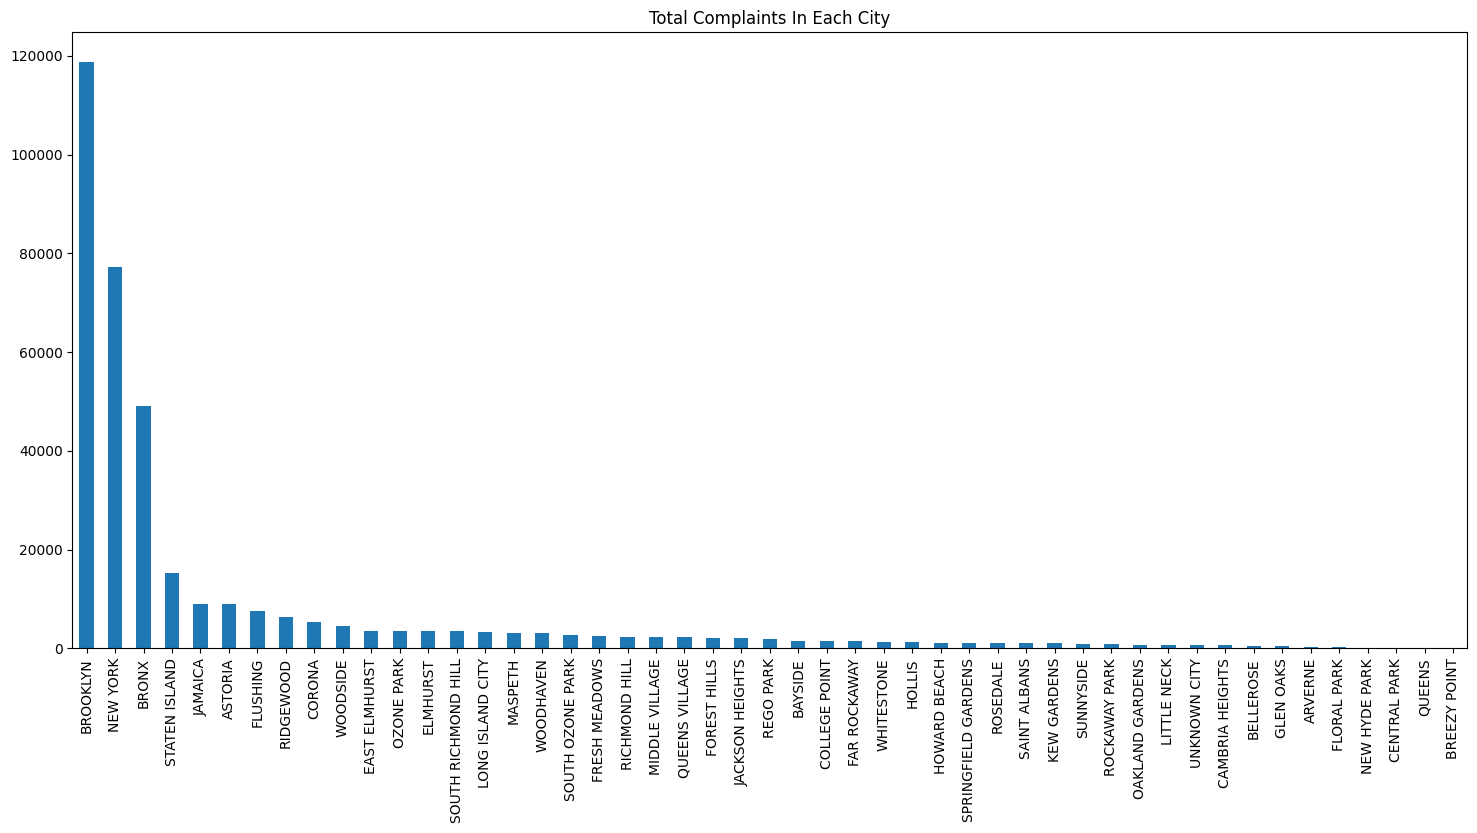

In [47]:
# Plot citywise complaint counts(total)
nyc_df['City'].value_counts().plot(kind='bar',rot=90, figsize=(18, 8), title='Total Complaints In Each City')

#### 3.3.7: Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

In [48]:
# Filitter Brooklin only records
brooklyn_df = nyc_df[nyc_df['City']=='BROOKLYN']

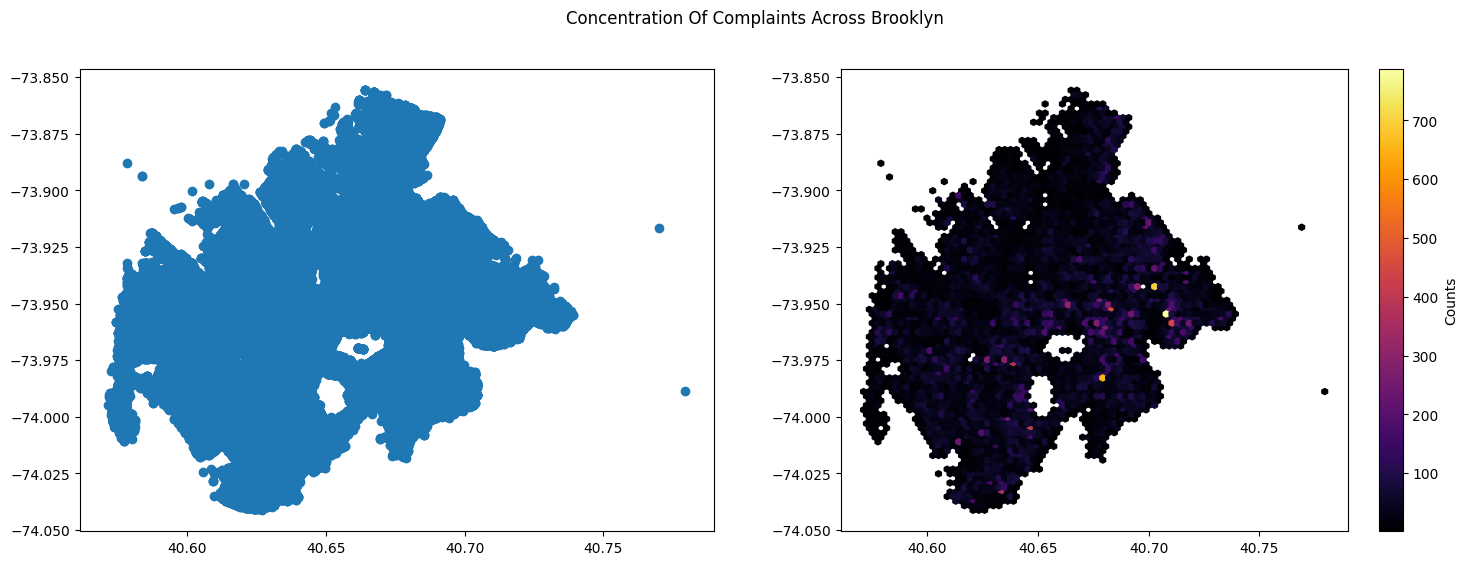

In [72]:
# Let see concentration of complaints across Brooklyn using scatter and hexbin plot

fig, axis = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Concentration Of Complaints Across Brooklyn')
# scatter plot
axis[0].scatter(x=brooklyn_df['Latitude'],y=brooklyn_df['Longitude'])

# hexbin plot
hb = axis[1].hexbin(x=brooklyn_df['Latitude'], y=brooklyn_df['Longitude'], mincnt=1, cmap='inferno', gridsize=80)
cb = fig.colorbar(hb, ax=axis[1])
cb.set_label('Counts')

## Step 4: Find major types of complaints

### 4.0: List of all complaint types

In [74]:
# Print all complaint types
nyc_df['Complaint Type'].value_counts()

Blocked Driveway             100624
Illegal Parking               91716
Noise - Street/Sidewalk       51139
Noise - Commercial            43751
Derelict Vehicle              21518
Noise - Vehicle               19301
Animal Abuse                  10530
Traffic                        5196
Homeless Encampment            4879
Vending                        4185
Noise - Park                   4089
Drinking                       1404
Noise - House of Worship       1068
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       475
Panhandling                     325
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Animal in a Park                  1
Name: Complaint Type, dtype: int64

### 4.1: Plot a bar graph to show the types of complaints

<AxesSubplot: title={'center': 'Complaints Types Distribution'}>

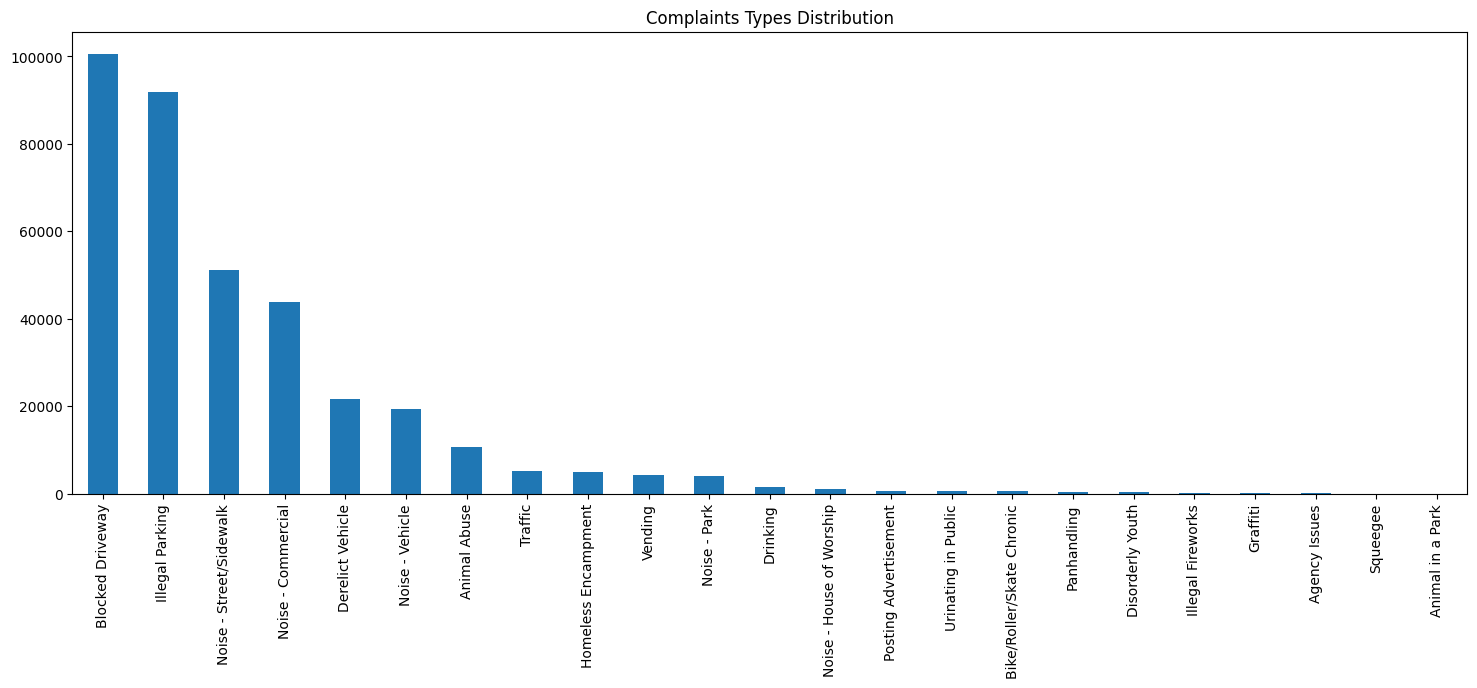

In [78]:
# plot total complaints based on type

nyc_df['Complaint Type'].value_counts().plot(kind='bar', rot=90, figsize=(18, 6), title='Complaints Types Distribution')

### 4.2: Check the frequency of various types of complaints for New York City

<AxesSubplot: title={'center': 'New York City Complaints Types Distribution'}, xlabel='Complaint Type'>

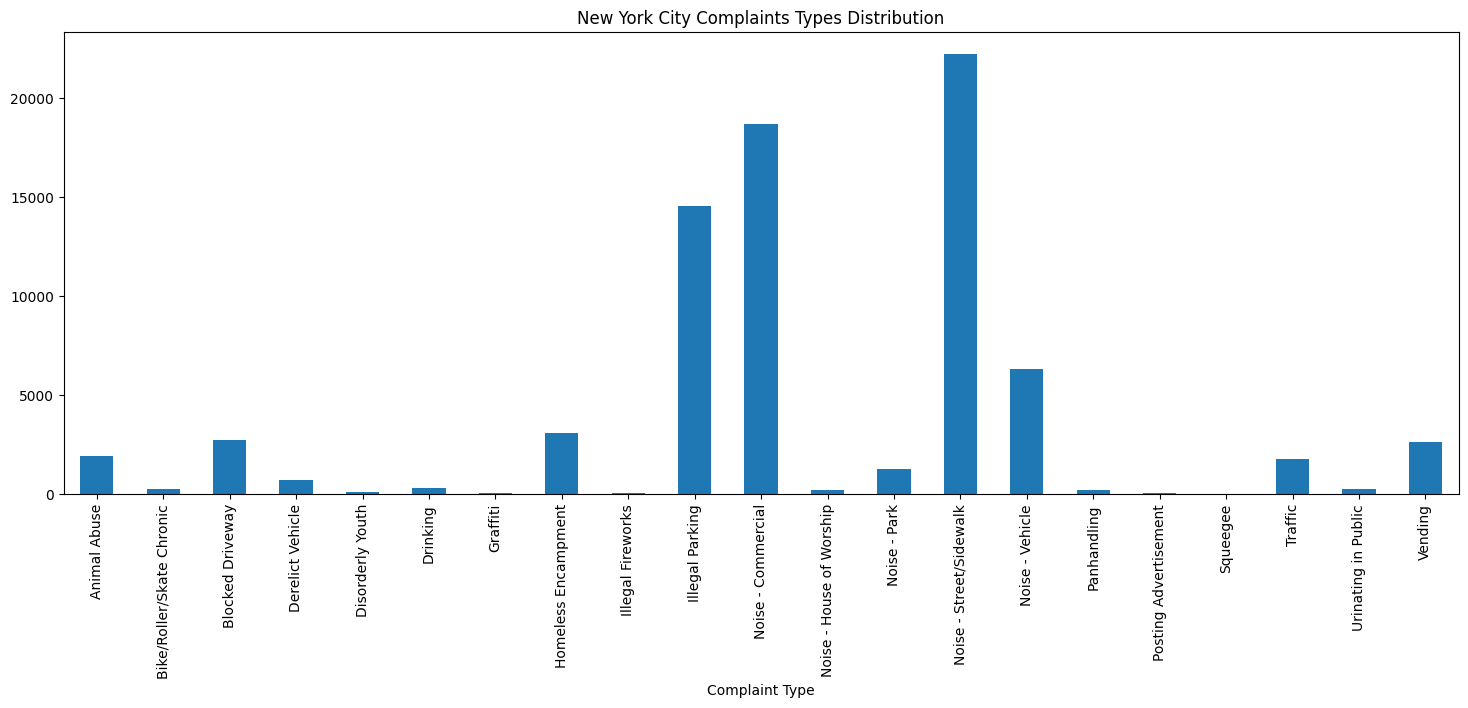

In [82]:
# Plot New York city complaints based on type
ny_city_complaints = nyc_df[nyc_df["City"] == "NEW YORK"].groupby(['Complaint Type'])['Unique Key'].count()
ny_city_complaints.plot(kind='bar', figsize=(18, 6), title='New York City Complaints Types Distribution')

### 4.3: Find the top 10 complaint types

In [83]:
nyc_df['Complaint Type'].value_counts()[:10]

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

Observation:
We can see, the top ten compliant types these are:  
Blocked Driveway, Illegal Parking, Noise-Street/Sidewalk, Noise-Commercial, Derelict Vehicle, Noise-Vehicle, 
Animal Abuse, Traffic,Homeless Encampment and Vending

### 4.4: Display the various types of complaints in each city

In [84]:
nyc_df.groupby(['City','Complaint Type'])['Unique Key'].count().unstack()

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,NaN,46.0,NaN,NaN,50.0,32.0,2.0,1.0,1.0,4.0,...,14.0,2.0,29.0,10.0,1.0,NaN,NaN,1.0,1.0,1.0
ASTORIA,NaN,170.0,NaN,16.0,3595.0,440.0,5.0,43.0,4.0,32.0,...,21.0,64.0,554.0,236.0,2.0,3.0,NaN,60.0,10.0,57.0
BAYSIDE,NaN,53.0,NaN,NaN,514.0,231.0,2.0,1.0,3.0,2.0,...,3.0,4.0,17.0,24.0,NaN,NaN,NaN,9.0,NaN,2.0
BELLEROSE,NaN,15.0,NaN,1.0,138.0,120.0,2.0,1.0,NaN,1.0,...,1.0,1.0,13.0,11.0,1.0,1.0,NaN,9.0,1.0,NaN
BREEZY POINT,NaN,2.0,NaN,NaN,3.0,3.0,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,NaN,1971.0,NaN,22.0,17062.0,2402.0,66.0,206.0,15.0,275.0,...,90.0,548.0,9144.0,3556.0,20.0,18.0,NaN,427.0,54.0,433.0
BROOKLYN,NaN,3191.0,NaN,124.0,36445.0,6257.0,79.0,291.0,60.0,948.0,...,389.0,1575.0,13982.0,5965.0,49.0,58.0,NaN,1258.0,155.0,575.0
CAMBRIA HEIGHTS,NaN,15.0,NaN,NaN,177.0,148.0,NaN,NaN,NaN,6.0,...,2.0,NaN,29.0,100.0,NaN,NaN,NaN,7.0,NaN,NaN
CENTRAL PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.5: Create a DataFrame, df_new, which contains cities as columns and complaint types in rows


In [85]:
df_new = pd.pivot_table(data=nyc_df, index='Complaint Type', columns='City', aggfunc='count', values='Unique Key')

In [86]:
df_new.shape

(23, 49)

In [87]:
df_new.head()

City,ARVERNE,ASTORIA,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,...,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,UNKNOWN CITY,WHITESTONE,WOODHAVEN,WOODSIDE
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
Animal Abuse,46.0,170.0,53.0,15.0,2.0,1971.0,3191.0,15.0,NaN,35.0,...,43.0,74.0,40.0,42.0,786.0,40.0,1.0,43.0,57.0,111.0
Animal in a Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike/Roller/Skate Chronic,NaN,16.0,NaN,1.0,NaN,22.0,124.0,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,10.0,2.0,2.0,4.0,2.0,5.0
Blocked Driveway,50.0,3595.0,514.0,138.0,3.0,17062.0,36445.0,177.0,NaN,597.0,...,318.0,1202.0,1946.0,330.0,2845.0,278.0,86.0,279.0,1363.0,2065.0


## Step 5: Visualize the major types of complaints in each city

### 5.0: Display the types of top 2 complaints in each city

<AxesSubplot: xlabel='City'>

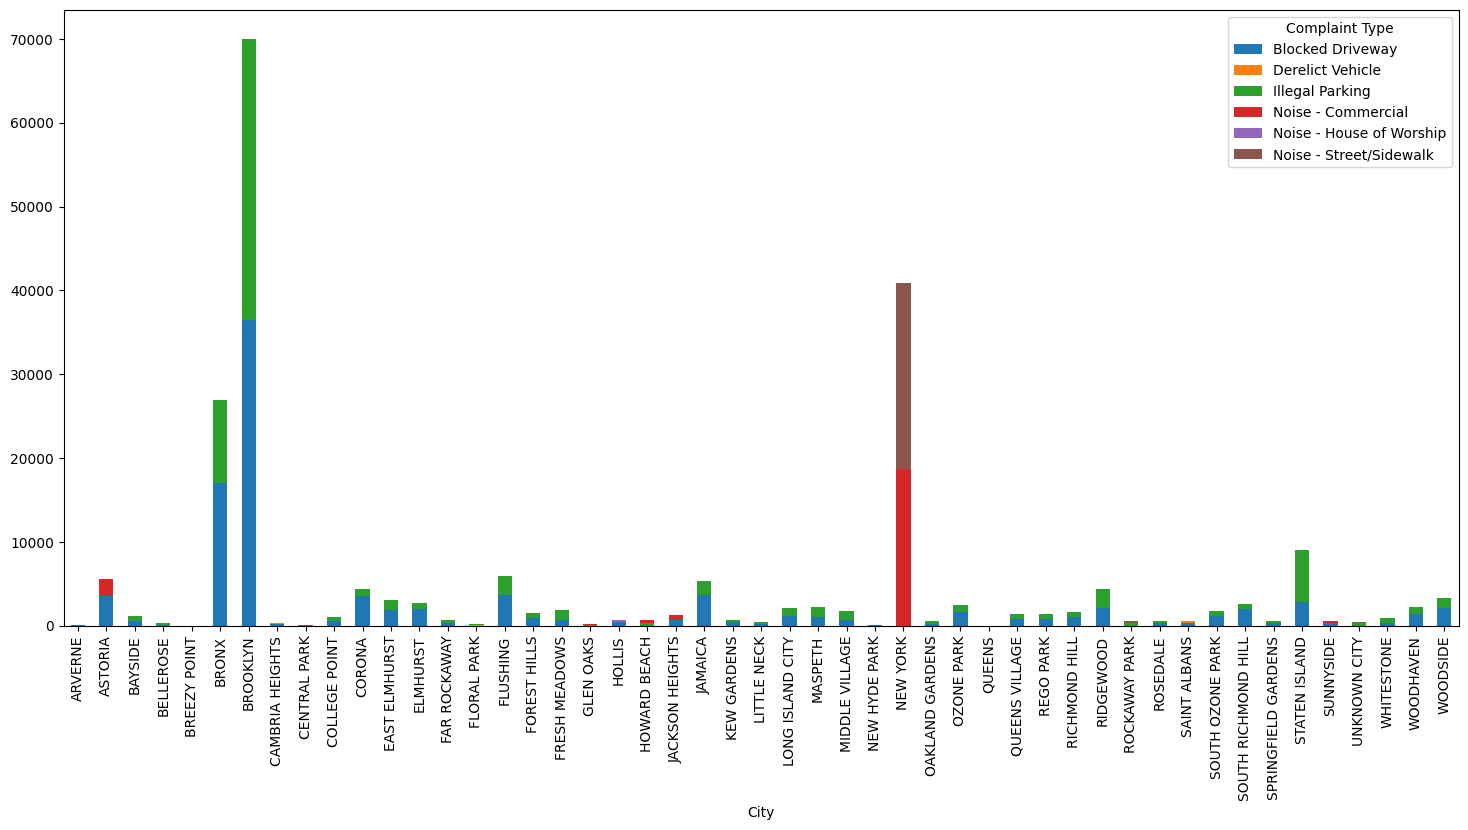

In [91]:
# Types of complaints in each city
agg_city_complaints = nyc_df.groupby(['City', 'Complaint Type']).size().to_frame('count').reset_index()

n=2
# Get top 2 types of complaints in each city 
agg_top_n_city = agg_city_complaints.groupby('City').apply(lambda x: x.nlargest(n, 'count')).reset_index(drop=True)

top_n_city_df = pd.pivot_table(agg_top_n_city, values='count', columns=['Complaint Type'], index="City", aggfunc=np.sum, fill_value=0)

# plto top 2 complaints
top_n_city_df.plot(kind="bar", stacked=True, rot=90, figsize=(18, 8))

Observation:
* As we can see, there are six top/common complaints among the cities.

### 5.1: Types of complaints in each city

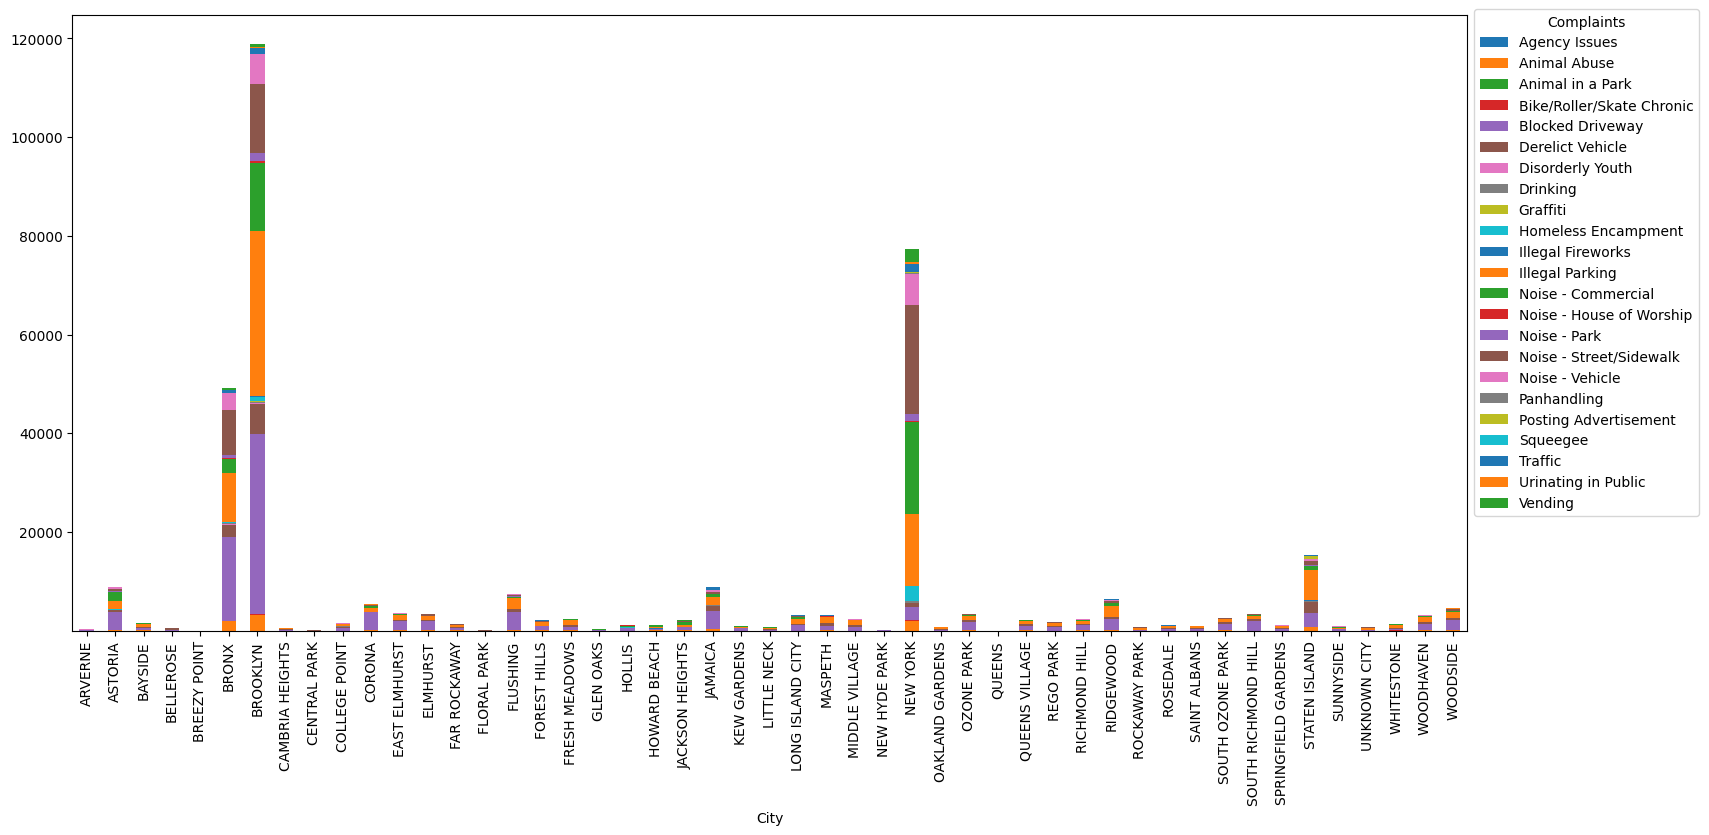

In [93]:
# Citywise complaint counts by types
agg_city_complaints = nyc_df.groupby(['City','Complaint Type'])['Unique Key'].count().unstack()
pl = agg_city_complaints.plot(kind="bar", stacked=True, rot=90, figsize=(18, 8)) 

pl.legend(title='Complaints', bbox_to_anchor=(1, 1.02), loc='upper left')

### 5.2: Sort the complaint types based on the average Request_Closing_Time grouping them for different locations

In [94]:
agg_city_complaints = nyc_df.groupby(['City','Complaint Type']).agg({'Request_Closing_Time':['mean']}).reset_index()
agg_city_complaints.columns = ['City','Complaint Type','Request_Closing_Time']
agg_city_complaints.sort_values(by="Request_Closing_Time", ascending=False)

,City,Complaint Type,Request_Closing_Time
425,MIDDLE VILLAGE,Bike/Roller/Skate Chronic,56456.000000
58,BELLEROSE,Homeless Encampment,54530.000000
280,GLEN OAKS,Animal Abuse,46768.600000
722,UNKNOWN CITY,Panhandling,44339.000000
121,CAMBRIA HEIGHTS,Homeless Encampment,41309.833333
...,...,...,...
507,QUEENS,Urinating in Public,1226.000000
484,OZONE PARK,Illegal Fireworks,1191.000000
165,EAST ELMHURST,Bike/Roller/Skate Chronic,908.000000
572,RIDGEWOOD,Posting Advertisement,895.000000


Observation:
* As we can see, MIDDLE VILLAGE has the largest average request closing time 
* where as ARVERNE has the least avrage request closing time

## Step 6: See whether the average response time across different complaint types

### 6.0: Check if the average response time across various types of complaints is same or not

* Since we are trying find the difference between one categorical(Complaint Type) and another continuous(Request_Closing_Time) variable,
* then we use the ANOVA test.

In [99]:
# Get top 10 compliant types column name
top_10_complaints = nyc_df['Complaint Type'].value_counts().head(10).index.to_list()
for i in range(len(top_10_complaints)):
    exec("c{} = nyc_df.loc[(nyc_df['Complaint Type'] == '{}'),'Request_Closing_Time']".format(i+1,top_10_complaints[i]))

In [100]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fscore,pvalue = stats.f_oneway(c1,c2,c3,c4,c5,c6,c7,c8,c9,c10)
print(fscore, pvalue)

1165.1968799099764 0.0


Observation:
* As pvalue of 0 < 0.05, we reject the null hypothesis. i.e the complaint types have on an average different response times

### 6.1: Visualize the average of Request_Closing_Time

In [109]:
av_time_S = nyc_df['Request_Closing_Time'].mean()
av_tim_H = av_time_S//(60*60)
md_time_S = nyc_df['Request_Closing_Time'].median()
md_tim_H = md_time_S//(60*60)

print(f'Average Closing Time in Seconds {av_time_S}')
print(f'Average Closing Time in Hours {av_tim_H}')
print(f'Median Closing Time in Seconds {md_time_S}')
print(f'Median Closing Time in Hours {md_tim_H}')

Average Closing Time in Seconds 13898.32684295248
Average Closing Time in Hours 3.0
Median Closing Time in Seconds 9539.0
Median Closing Time in Hours 2.0


## Step 7: Identify the significant variables by performing statistical analysis using p-values

Are the type of complaint and location related?
* Since both variables are categorical(Complaint Type, City), then we use the Chi-Square test.

In [102]:
# Chi square test Complaint Type and Location
ctab_df = pd.crosstab(nyc_df['Complaint Type'], nyc_df['City'])
stat, p, dof, expected = chi2_contingency(ctab_df)
print('Chi-Square Statistic Value: ',stat)
print('p value: ',p)
print('degrees of freedom: ',dof)

Chi-Square Statistic Value:  145100.58326771628
p value:  0.0
degrees of freedom:  1056


Observation:
* As pvalue of 0 < 0.05, we reject the null hypothesis. i.e the complaint type and city accept the hypothesis that a relationship exists between compliant and city

## Step 8: Perform a Kruskal-Wallis H test 

In [108]:
# get Bronx and New York cities
br_city_df = nyc_df[nyc_df['City']== 'BRONX'] 
ny_city_df = nyc_df[nyc_df['City']== 'NEW YORK'] 
x = br_city_df['Request_Closing_Time'].to_list() 
y = ny_city_df['Request_Closing_Time'].to_list() 

#Kruskal-Wallis H test 
stats.kruskal(x, y)

KruskalResult(statistic=12950.368176219685, pvalue=0.0)

Observation:
* As pvalue of 0 < 0.05, we reject the null hypothesis. i.e one or more sample distributions are not equal
